# Cellular automata

The goal of this exercise is to familiarize with cellular automata and compare non-trivial automata to simpler ones.

Additionally we want to check different complexities of cellular automata for varying values of radius and number of rules.

## Run cellular automata from cellpylib.

Create starting conditions

In [73]:
import cellpylib as cpl
import numpy as np

# starting condition - one point
one_point = np.zeros(128)[None, :].astype(int)
one_point[:, 64] = 1

# starting condition - two points
two_points = np.zeros(128)[None, :].astype(int)
two_points[:, [32, 96]] = 1

# starting condition - random points
random_points = np.zeros(128)[None, :].astype(int)
random_points[:, np.random.randint(0, 128, 64)] = 1

Utility function for easier plotting and experimentation

In [74]:
def get_simple_results(
    rule, start_state, k=2, r=1, printing=True, plotting=True, output=False
):

    # create a rulebook from a passed parameter
    if type(rule) == int:
        rulebook = lambda n, c, t: cpl.nks_rule(n, rule)
    else:
        rulebook = lambda n, c, t: cpl.table_rule(n, rules)

    # compute the automaton
    cellular_automaton = cpl.evolve(
        start_state,
        timesteps=200,
        memoize=True,
        apply_rule=rulebook,
        r=r,
    )

    H = cpl.average_cell_entropy(cellular_automaton)  # average entropy
    I = cpl.average_mutual_information(cellular_automaton)  # average mutual information
    LMC = H * (np.log2(k) - H)  # LMC (log2(k) is the maximum H)

    if printing:
        print(f"H  : {H}")
        print(f"I  : {I}")
        print(f"LMC: {LMC}")

    if plotting:
        cpl.plot(cellular_automaton)

    if output:
        return H, I, LMC

# Display example cellular automata for simple rulesets

H  : 0.8281142923192778
I  : 0.8220834172745759
LMC: 0.14234101117581952


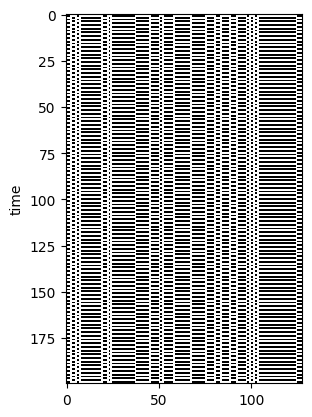

In [75]:
get_simple_results(1, random_points)

Very simple and repetitive pattern

H  : 0.3584554209189061
I  : 0.012528902588303996
LMC: 0.22996513213275593


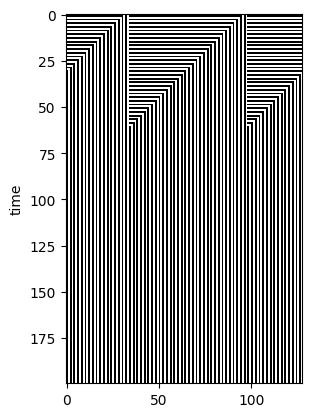

In [76]:
get_simple_results(69, two_points)

H  : 0.9981368603853846
I  : 0.7702167973276866
LMC: 0.0018596683253918232


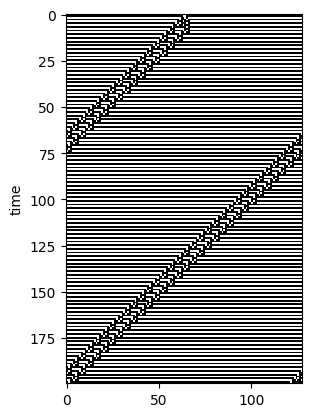

In [89]:
get_simple_results(121, one_point)

We can see a local structure that moves through space and time. Most of the automaton's state remains steady however that one, more complex pattern moves through it.

H  : 0.7473212300231085
I  : 0.00046462549539223914
LMC: 0.18883220917985669


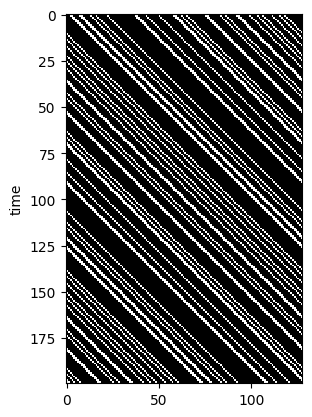

In [90]:
get_simple_results(245, random_points)

It seems that with these tools we have ability to quickly compare complexity metrics of different cellular automata.

Let's try to assess non-trivial automata

## Display results for non-trivial automata (30, 45, 106, 154) and compute complexity.

### Rule 30

H  : 0.9734841793299066
I  : 0.0159629925213255
LMC: 0.02581273192428484


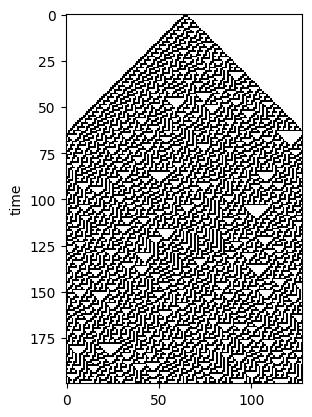

In [91]:
get_simple_results(30, one_point)

H  : 0.988664600681556
I  : 0.008363988317559239
LMC: 0.011206908040735382


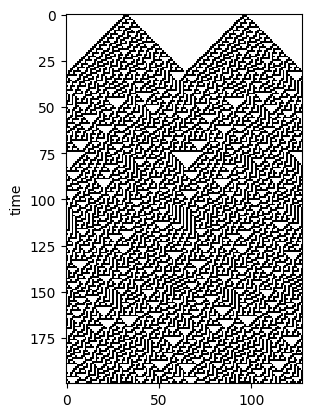

In [92]:
get_simple_results(30, two_points)

H  : 0.9964123868485796
I  : 0.0041332814695137325
LMC: 0.0035747421832961765


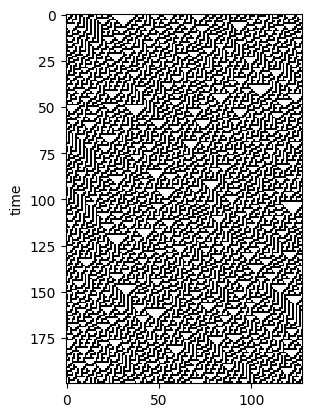

In [93]:
get_simple_results(30, random_points)

The automaton seems to be behaving randomly but creates similar shapes of different sizes

We can see high entropy values and chaotic patterns. There's a lot of information in the data but the complexity is low.

Observation: We can see that the value of mutual information metric and LMC is low for all three examples. Unlike in simple cases from before, these values are both very low.

### Rule 45

H  : 0.9975542051995029
I  : 0.04459001639617744
LMC: 0.0024398128882909755


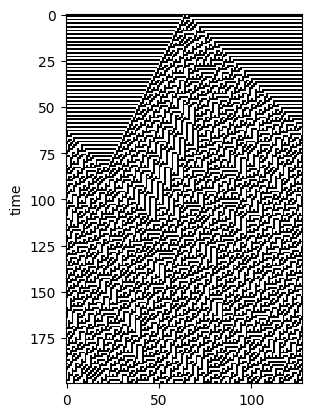

In [80]:
get_simple_results(45, one_point)

H  : 0.9967147965996187
I  : 0.012055913749236223
LMC: 0.0032744108389994213


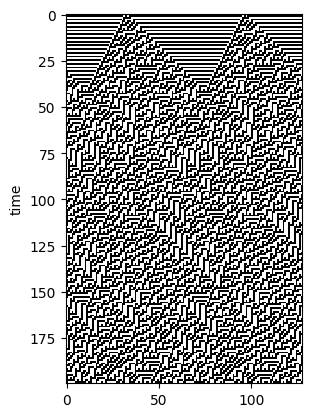

In [81]:
get_simple_results(45, two_points)

H  : 0.9966836125392551
I  : 0.002737339288486384
LMC: 0.0033053890349551323


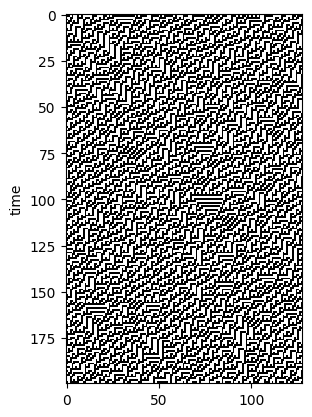

In [82]:
get_simple_results(45, random_points)

Another automaton that seemingly behaves randomly.

Just like before the entropy is high but the complexity is not.

Again both mutual information and LMC are very low.

### Rule 106

H  : 0.06531506683748498
I  : 9.766890688984097e-05
LMC: 0.06104900888149985


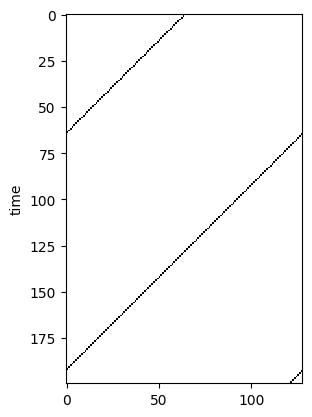

In [83]:
get_simple_results(106, one_point)

H  : 0.11599568915468228
I  : 0.00036097281694139234
LMC: 0.1025406892522126


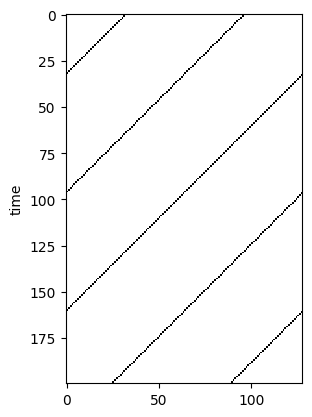

In [44]:
get_simple_results(106, two_points)

H  : 0.9965731223131895
I  : 0.0031697322969214143
LMC: 0.0034151341961301328


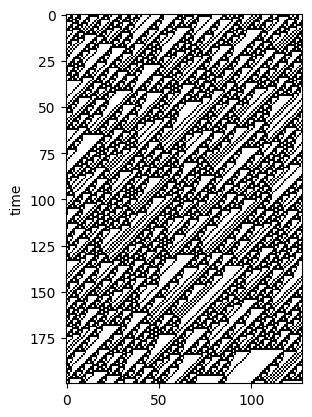

In [45]:
get_simple_results(106, random_points)

For two points, created lines never meet and chaotic patterns do not form.

It is clear that the ruleset only creates chaotic patterns only if there are more than 2 positive values in the input. 

Again we observe very low values of both LMC and mutual information.

---

### Rule 164

H  : 0.0
I  : 0.0
LMC: 0.0


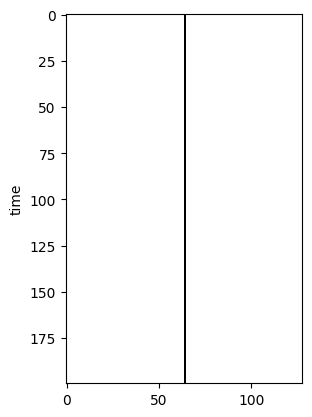

In [105]:
get_simple_results(164, one_point)

H  : 0.0
I  : 0.0
LMC: 0.0


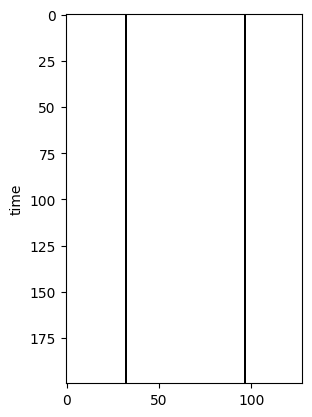

In [47]:
get_simple_results(164, two_points)

H  : 0.07493763653092102
I  : 0.025925543052031583
LMC: 0.06932198716208059


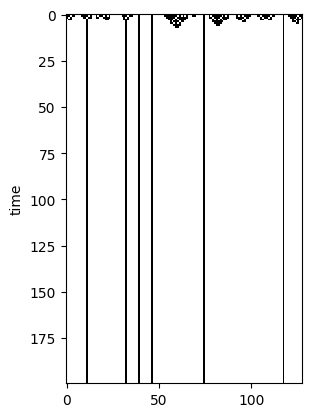

In [48]:
get_simple_results(164, random_points)

We can see that the automaton reaches a steady state at the end.

We have a very poor amount of information as the values quickly fall down to a steady state. The complexity is also low.

### Important observation! All 4 non-trivial rulesets have very low values of LMC and mutual information.

---

### Additional observations

After running some experiments with input patterns for the ruleset 164 I noticed that all possible combinations stablize after a short while. At most at half of the input size.

H  : 0.44905788411636466
I  : 0.32991370060478475
LMC: 0.24740490082929828


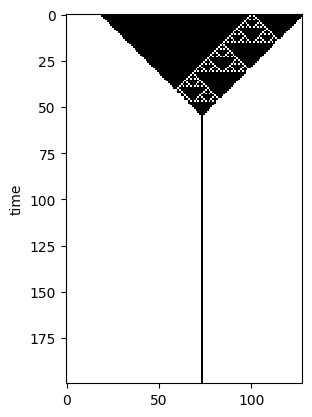

In [49]:
two_points_extra = np.ones(128)[None, :].astype(int)
two_points_extra[:, 1:18] = 0
two_points_extra[:, 100] = 0

get_simple_results(164, two_points_extra)

For some of the cases we managed to actually get high value of LMC and mutual information contrary to previous experiments.

# Edge of chaos

By experimenting with [edge of chaos](https://math.hws.edu/eck/js/edge-of-chaos/CA.html) we noticed that the complex patterns that move through space and time appear for lambda equal to around 0.55.

To assess that we want to compute the metrics of example automata to find one with high complexity and display it.

We search through different values for numbers of states and radius.

In [126]:
import pandas as pd

states = np.arange(2, 7)
radius = np.arange(1, 5)

df = pd.DataFrame(columns=["n_states"] + [f"radius: {r}" for r in radius])

# iterate over number of states
for k in states:
    tmp_dict = {"n_states": k}  # dictionary to create a table

    for r in radius:  # iterate over radiuses
        start_state = cpl.init_random(256, k=k)  # create initial state

        rules, _, _ = cpl.random_rule_table(
            lambda_val=0.55,
            k=k,
            r=r,
            strong_quiescence=True,
            isotropic=False,
        )  # create a ruleset

        # get metrics
        H, I, LMC = get_simple_results(
            rules, start_state, k, r, printing=False, plotting=False, output=True
        )

        tmp_dict[f"radius: {r}"] = LMC
    df.loc[len(df)] = tmp_dict
df.set_index("n_states")

,radius: 1,radius: 2,radius: 3,radius: 4
n_states,,,,
2,0.000435,0.002355,0.004502,0.015065
3,0.303706,0.099779,0.054804,0.085039
4,0.964085,0.298365,0.281497,0.266414
5,1.204349,0.669407,0.531313,0.491961
6,0.818340,0.787231,0.711329,0.764604


We can see that the complexity grows with the numer of states, however, it's interesting to see that it seems to be decreasing with bigger radius.
We weren't able to compute higher values of radius and number of states due to the long computation time for higher values of these parameters.

### Display an example

Plot the last cellular automaton for 6 states and radius of 4 (9 input elements)

H  : 2.2562474509329125
I  : 0.10356744779643524
LMC: 0.74166249316801


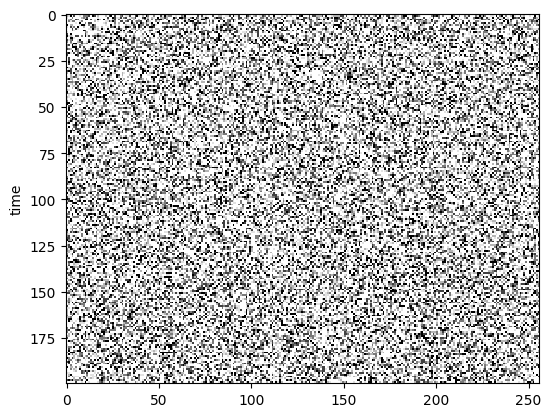

In [124]:
get_simple_results(rules, start_state, 6, 4)

While doing this task I noticed a bug in cellpylib and opened an [issue](https://github.com/lantunes/cellpylib/issues/36) in the repository.

It turns out the entropy computation for higher numbers of states is bugged.

### Visualize the highest complexity system

Let's try to plot the system of the highest complexity (6 states and radius of 1)

H  : 1.4006841245415003
I  : 0.3992214611764259
LMC: 1.6587999205526307


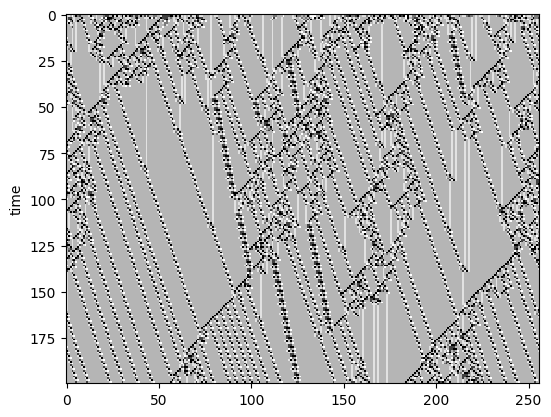

In [121]:
start_state = cpl.init_random(256, k=4)

rules, _, _ = cpl.random_rule_table(
    lambda_val=0.55, k=6, r=1, strong_quiescence=True, isotropic=False
)

get_simple_results(rules, start_state, 6, 1)


We managed to find a high complexity automaton! Note that the scores here are different than in the table, as the ruleset is randomly generated again based on lambda parameter.

We can see complex patters that move through time and the position in the automaton state.

We can observe 3 kinds of such patterns. vertical white lines, thick groups of states and slightly more angled thinner groups.

---

## Conclusion

We examined cellular automata in simple cases as well as more complex ones with multiple states and larger radius.

We implemented and measured the metrics of complexity and measured the complexity of several automata showing how different kinds of patterns are formed.

We showed repetitive, stable, random and complex patterns and measured their complexity.